In [511]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine

#### Соединение с базой данных MySQL

In [512]:
# Укажите параметры соединения с базой данных MySQL
db_host = '127.0.0.1'
db_user = 'root'
db_password = 'Vikakashley080404'
db_name = 'homeassistant'

# Формируем строку подключения
connection_str = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"

# Создаем соединение с базой данных
engine = create_engine(connection_str)

# Укажите ваш SQL-запрос
sql_query = 'SELECT * FROM states'

# Читаем данные из MySQL и загружаем их в DataFrame
df = pd.read_sql(sql_query, engine)

# Выводим DataFrame
print(df)


         state_id                                          entity_id  \
0          991389        sensor.wireless_router_archer_c7_b_received   
1          991390            sensor.wireless_router_archer_c7_b_sent   
2          991391  sensor.wireless_router_archer_c7_packets_received   
3          991392      sensor.wireless_router_archer_c7_packets_sent   
4          991393  sensor.wireless_router_archer_c7_packets_s_rec...   
...           ...                                                ...   
1293675   2285064    sensor.wireless_router_archer_c7_kib_s_received   
1293676   2285065        sensor.wireless_router_archer_c7_kib_s_sent   
1293677   2285066  sensor.wireless_router_archer_c7_packets_s_rec...   
1293678   2285067    sensor.wireless_router_archer_c7_packets_s_sent   
1293679   2285068                                            sun.sun   

                 state attributes event_id               last_changed  \
0             88899264       None     None                    

#### Вывод датчиков

In [513]:
unique_entity_ids = df['entity_id'].unique()
print(unique_entity_ids)

['sensor.wireless_router_archer_c7_b_received'
 'sensor.wireless_router_archer_c7_b_sent'
 'sensor.wireless_router_archer_c7_packets_received'
 'sensor.wireless_router_archer_c7_packets_sent'
 'sensor.wireless_router_archer_c7_packets_s_received'
 'sensor.wireless_router_archer_c7_packets_s_sent'
 'sensor.illuminance_0xc46e7baa8a32'
 'sensor.wireless_router_archer_c7_kib_s_received'
 'sensor.wireless_router_archer_c7_kib_s_sent' 'sun.sun'
 'sensor.datchik_vlazhnosti_i_temperatury_temperature'
 'sensor.datchik_vlazhnosti_i_temperatury_humidity'
 'sensor.datchik_vlazhnosti_i_temperatury_pressure'
 'sensor.0x00158d00054be1d4_temperature'
 'sensor.0x00158d00054be1d4_humidity' 'sensor.0x00158d00054be1d4_pressure'
 'binary_sensor.datchik_dvizheniia_occupancy' 'binary_sensor.okno_contact'
 'device_tracker.maxvi' 'device_tracker.redmi_5_plus'
 'device_tracker.huawei_p50' 'binary_sensor.otkryvanie_dverei_contact'
 'update.home_assistant_core_update' 'device_tracker.tm_d328'
 'update.home_assist

Значения каждого атрибута
* state_id: Уникальный идентификатор состояния. 
* entity_id: Идентификатор датчика давления.
* state: Значение измеренного давления.
* attributes: Дополнительные атрибуты, связанные с измерениями. В этом примере они отмечены как None.
* event_id: Уникальный идентификатор события. В данном случае, все значения None.
* last_changed: Временная метка последнего изменения состояния.
* last_updated: Временная метка последнего обновления.
* old_state_id: Уникальный идентификатор предыдущего состояния.
* attributes_id: Уникальный идентификатор атрибутов.
* context_id, context_user_id, context_parent_id: Идентификаторы контекста, пользователя и родительского контекста.
* origin_idx: Индекс происхождения данных. 

#### Предварительный анализ и очистка данных

*Вывод примерных данных для датчика давления sensor.datchik_vlazhnosti_i_temperatury_pressure*

In [514]:
pressure_data = df[df['entity_id'] == 'sensor.datchik_vlazhnosti_i_temperatury_pressure']
print("Количество записей для датчика давления:", len(pressure_data))
print("Пример данных для датчика давления:")
print(pressure_data.head())

Количество записей для датчика давления: 2884
Пример данных для датчика давления:
      state_id                                         entity_id  state  \
194     991583  sensor.datchik_vlazhnosti_i_temperatury_pressure    999   
911     992300  sensor.datchik_vlazhnosti_i_temperatury_pressure  999.1   
953     992342  sensor.datchik_vlazhnosti_i_temperatury_pressure  999.2   
1275    992664  sensor.datchik_vlazhnosti_i_temperatury_pressure  998.9   
1823    993212  sensor.datchik_vlazhnosti_i_temperatury_pressure  998.8   

     attributes event_id last_changed               last_updated  \
194        None     None          NaT 2022-08-29 01:26:44.276120   
911        None     None          NaT 2022-08-29 02:15:56.040835   
953        None     None          NaT 2022-08-29 02:18:16.788834   
1275       None     None          NaT 2022-08-29 02:40:42.545470   
1823       None     None          NaT 2022-08-29 03:18:01.043099   

      old_state_id  attributes_id                  context

*Вывод информации о количественных характеристиках датасета*

In [515]:
print("Информация о данных:")
print(pressure_data.info())

# Вывод статистики по количественным признакам
print("Описательная статистика для количественных характеристик:")
print(pressure_data.describe())

# Проверка на наличие отсутствующих значений
print("Отсутствующие значения:")
print(pressure_data.isnull().sum())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 2884 entries, 194 to 1293109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   state_id           2884 non-null   int64         
 1   entity_id          2884 non-null   object        
 2   state              2884 non-null   object        
 3   attributes         0 non-null      object        
 4   event_id           0 non-null      object        
 5   last_changed       0 non-null      datetime64[ns]
 6   last_updated       2884 non-null   datetime64[ns]
 7   old_state_id       2879 non-null   float64       
 8   attributes_id      2884 non-null   int64         
 9   context_id         2884 non-null   object        
 10  context_user_id    0 non-null      object        
 11  context_parent_id  0 non-null      object        
 12  origin_idx         2884 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3)

*Очистка данных от нулевых значений*

In [516]:
df_cleaned = pressure_data.dropna(axis=1, how='all')
df_cleaned = df_cleaned.drop(columns=['origin_idx'], axis=1)

*Иллюстрация структуры данных*

In [517]:
df_cleaned.head()

,state_id,entity_id,state,last_updated,old_state_id,attributes_id,context_id
194,991583,sensor.datchik_vlazhnosti_i_temperatury_pressure,999,2022-08-29 01:26:44.276120,NaN,28,01GBKKAH9M9V15F9PKP7PPPYQT
911,992300,sensor.datchik_vlazhnosti_i_temperatury_pressure,999.1,2022-08-29 02:15:56.040835,991583.0,28,01GBKP4KW8P4SEWBA4WTEA02T7
953,992342,sensor.datchik_vlazhnosti_i_temperatury_pressure,999.2,2022-08-29 02:18:16.788834,992300.0,28,01GBKP8XAMRTD6YFKHM9CV0F03
1275,992664,sensor.datchik_vlazhnosti_i_temperatury_pressure,998.9,2022-08-29 02:40:42.545470,992342.0,28,01GBKQHZHH2F9H6AZSH8TZ95F4
1823,993212,sensor.datchik_vlazhnosti_i_temperatury_pressure,998.8,2022-08-29 03:18:01.043099,992664.0,28,01GBKSP9JK1F45KFY5QF69HFT0


#### Преобразование атрибутов в числовой признак

In [518]:
df_cleaned['last_updated'] = pd.to_datetime(df_cleaned['last_updated'])
df_cleaned['state'] = pd.to_numeric(df_cleaned['state'], errors='coerce')
df_cleaned['month'] = df_cleaned['last_updated'].dt.month
df_cleaned['day'] = df_cleaned['last_updated'].dt.day
df_cleaned['time_hours'] = df_cleaned['last_updated'].dt.hour + df_cleaned['last_updated'].dt.minute / 60

#### Описательный анализ данных
* определение шкалы измерения каждого признака;
* выявление аномальных значений;
* визуализация распределения каждого признака;
* построение кореллограмм; 
* построение совместных распределений каждого признака с целевой переменной;
* выявление коррелированных признаков и признаков, не несущих информации для данной задачи.

C:\Users\37529\AppData\Local\Temp\ipykernel_2356\2269524252.py:12: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



state_id - Шкала измерения: Интервальная
entity_id - Шкала измерения: Номинальная
state - Шкала измерения: Количественная
last_updated - Шкала измерения: Неопределенная
old_state_id - Шкала измерения: Количественная
context_id - Шкала измерения: Номинальная
month - Шкала измерения: Интервальная
day - Шкала измерения: Интервальная
time_hours - Шкала измерения: Количественная
Нет аномальных значений для state


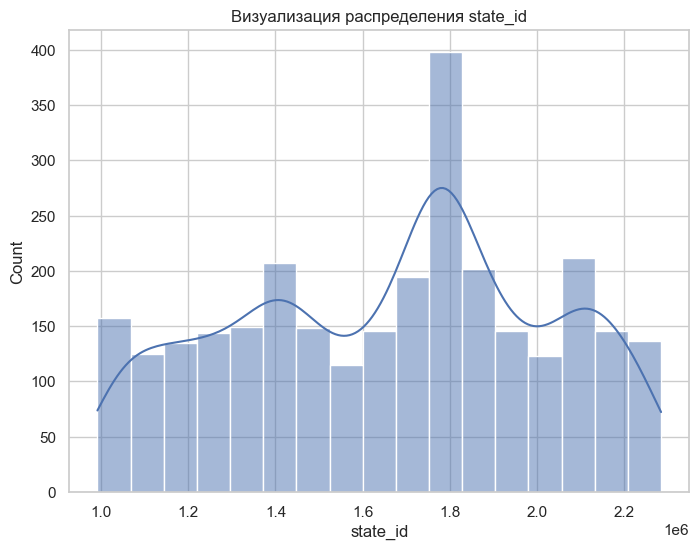

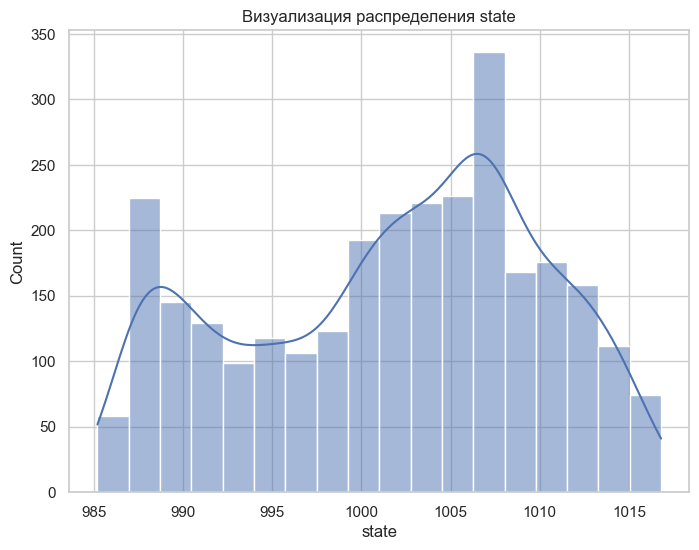

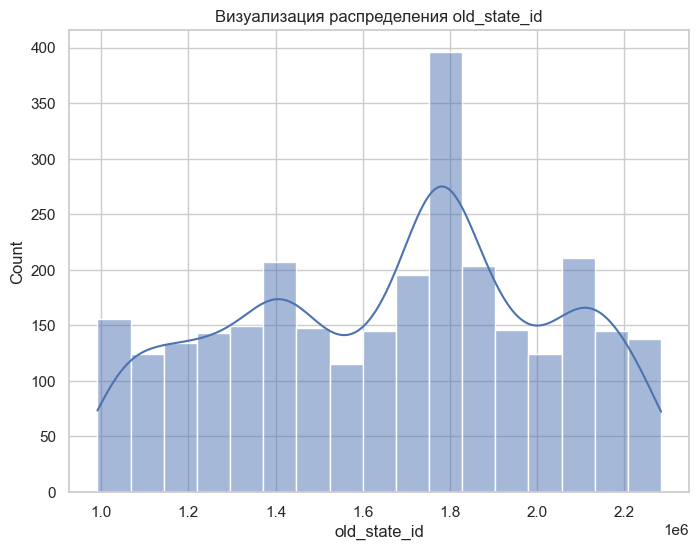

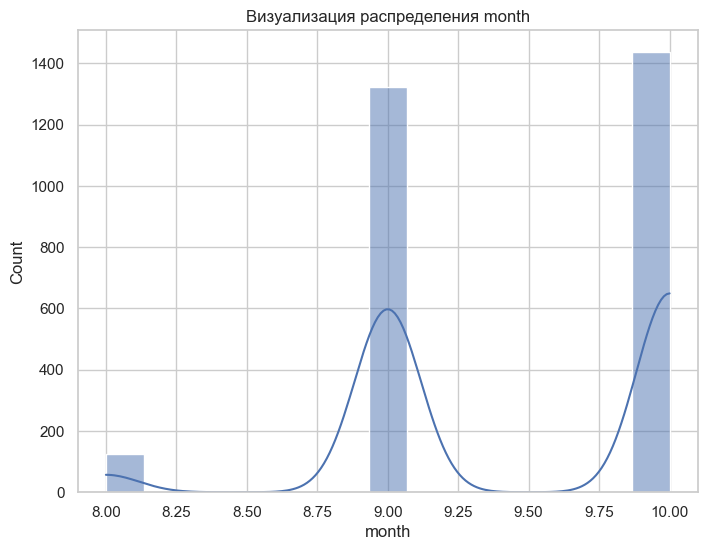

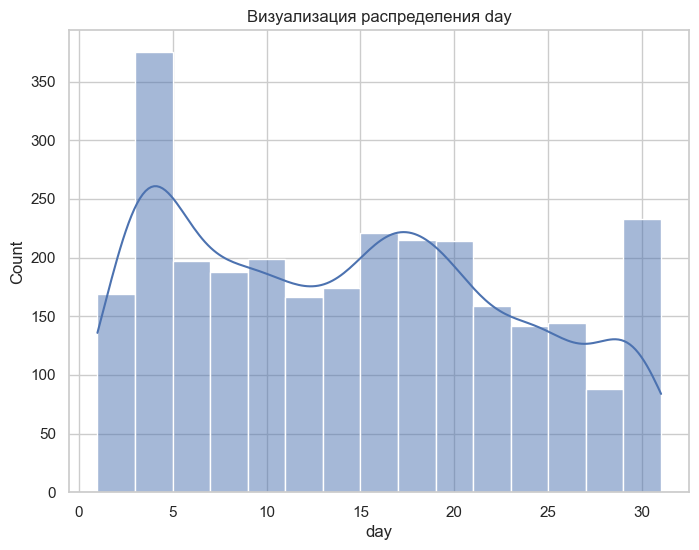

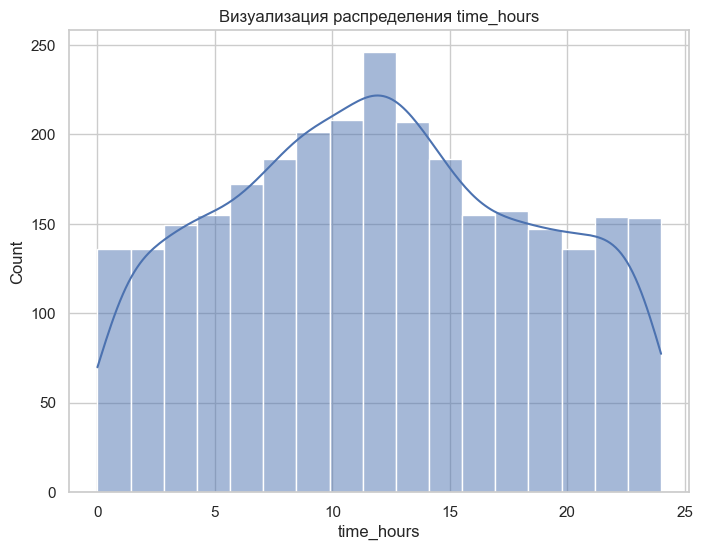

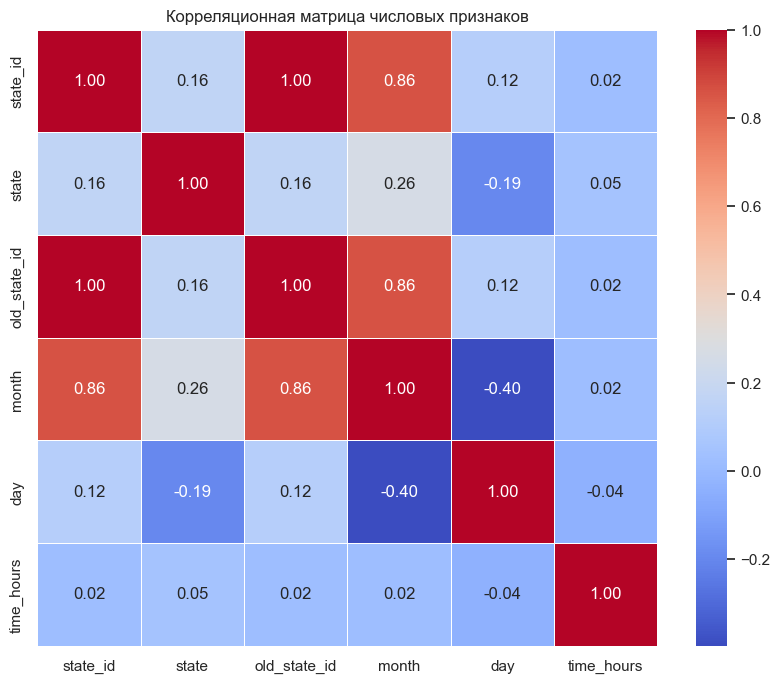

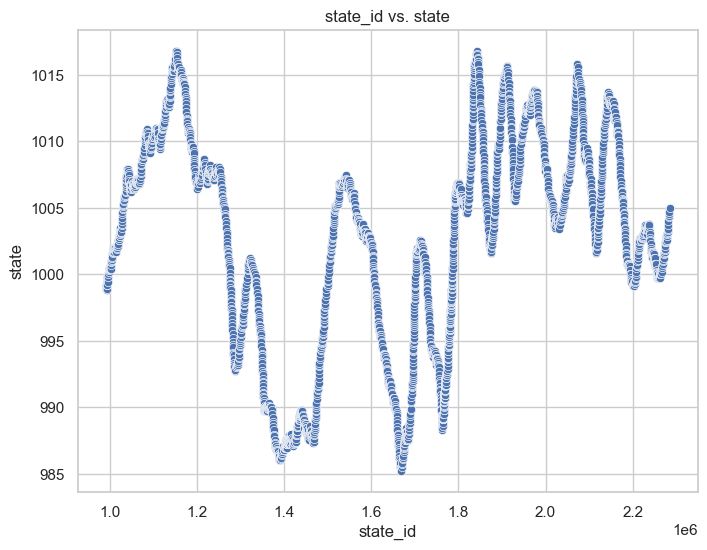

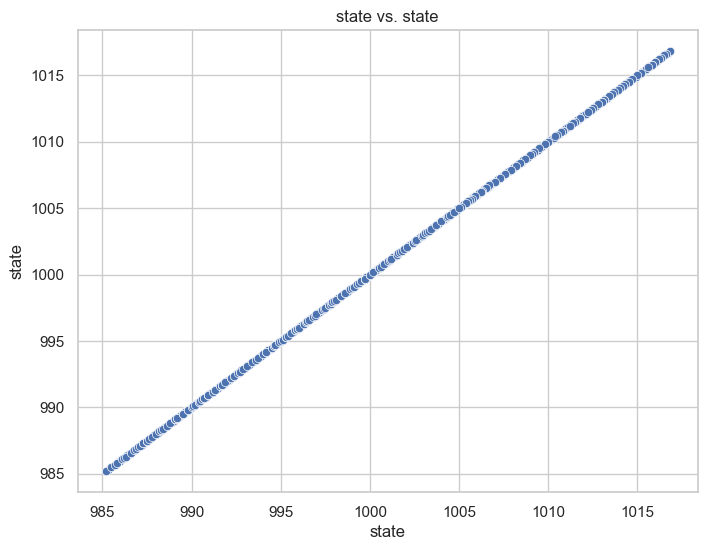

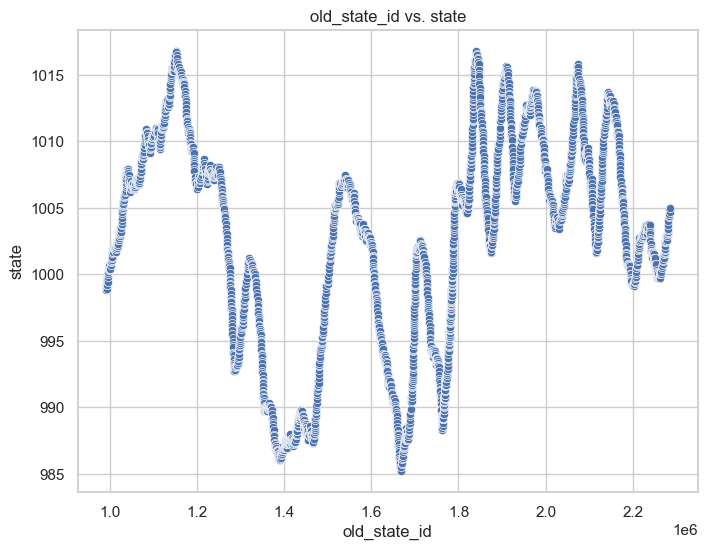

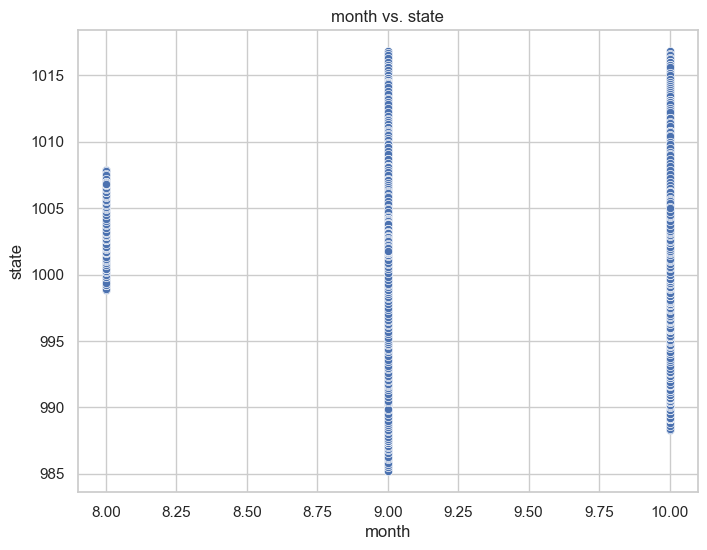

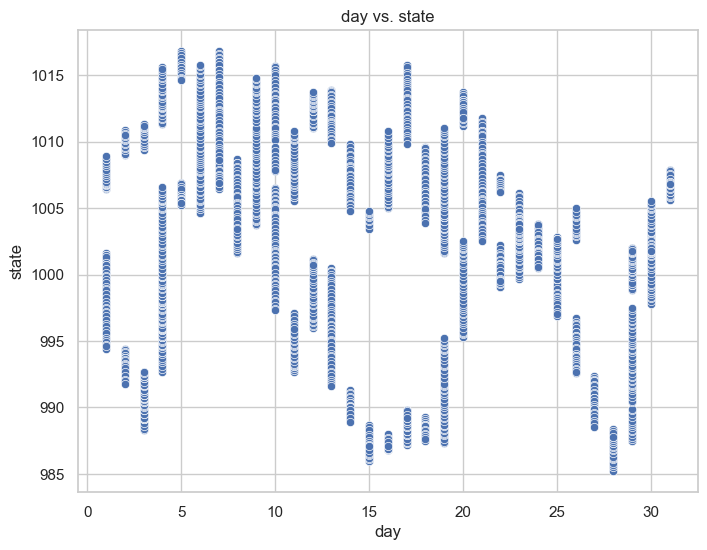

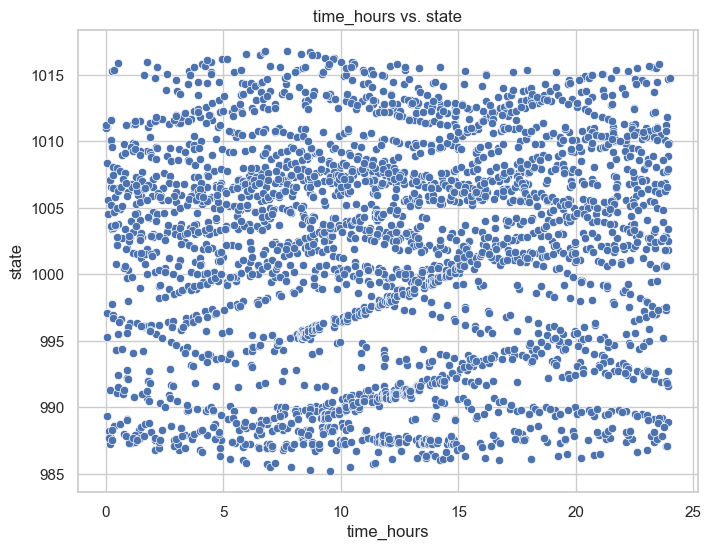


Коррелированные признаки: ['old_state_id', 'month']


In [520]:
# Убираем элементы, имеющие постоянные значения 
df_cleaned = df_cleaned.drop(columns=['attributes_id'], errors='ignore')

# Выбираем данные с числовыми признаками
numeric_features = df_cleaned.select_dtypes(include=['number'])

# 1. Определение шкалы измерения каждого признака.
for column in df_cleaned.columns:
    dtype = df_cleaned[column].dtype
    if pd.api.types.is_numeric_dtype(dtype):
        if pd.api.types.is_integer_dtype(dtype):
            print(f"{column} - Шкала измерения: {('Номинальная', 'Порядковая', 'Интервальная', 'Количественная')[pd.api.types.is_categorical_dtype(df_cleaned[column]) + 2]}")
        else:
            print(f"{column} - Шкала измерения: {'Количественная'}")
    elif pd.api.types.is_object_dtype(dtype):
        print(f"{column} - Шкала измерения: {'Номинальная'}")
    else:
        print(f"{column} - Шкала измерения: {'Неопределенная'}")


# 2. Выявление аномальных значений.
anomalous_values_threshold = 2  # Порог для определения аномалий 
feature = 'state'

anomalous_values = df_cleaned[feature][abs(df_cleaned[feature] - df_cleaned[feature].mean()) > anomalous_values_threshold * df_cleaned[feature].std()]

if not anomalous_values.empty:
    print(f"Аномальные значения для {feature}:\n{anomalous_values}")
else:
    print(f"Нет аномальных значений для {feature}")

# 3. Визуализация распределения каждого числового признака.
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f'Визуализация распределения {feature}')
    plt.show()

# 4. Построение коррелограммы для числовых признаков.
correlation_matrix = numeric_features.corr()

# Построим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Корреляционная матрица числовых признаков')
plt.show()

# 5. Построение совместных распределений числовых признаков с целевой переменной.
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_cleaned[feature], y=df_cleaned['state'])
    plt.title(f'{feature} vs. state')
    plt.show()

# 6. Выявление коррелированных признаков
correlation_threshold = 0.5
correlation_matrix_upper = np.triu(correlation_matrix, k=1)  # Получаем верхний треугольник

correlated_features = set()

for i, col in enumerate(correlation_matrix.columns):
    correlated_cols = correlation_matrix.columns[np.abs(correlation_matrix_upper[i]) > correlation_threshold]
    correlated_features.update(correlated_cols)

# Вывод информации о коррелированных признаках
print(f'\nКоррелированные признаки: {list(correlated_features)}')